# Biber Daten Visualisierung

Steps:
  * Excel einlesen mit Pandas
  * Box & Whiskers Plot für jede Stufe, aggregiert pro Klasse.

In [ ]:
%pip install pandas matplotlib openpyxl hvplot pandas-bokeh

In [172]:
import pandas as pd

df = pd.read_excel('data/Wettbewerb 2024 Resultate.xlsx', 'Results Export')

df = df.loc[df['Gruppe'] == 'Schuljahre 9 und 10']
df = df[['Teamchef Klassen-/ Kursname', 'Total']].rename(columns={'Teamchef Klassen-/ Kursname': 'Klasse', 'Total' : 'Punkte'})


In [173]:
overall = df.assign(Klasse = 'KSR')
overall
df = pd.concat([df, overall])
df

,Klasse,Punkte
0,2Mdz,168
1,2Mdz,164
2,1Mez,147
3,2Mez,147
4,2Mfz,147
...,...,...
187,KSR,36
188,KSR,34
189,KSR,33
190,KSR,32


<Axes: title={'center': 'KSR: Punkte nach Klasse'}, xlabel='Klasse'>

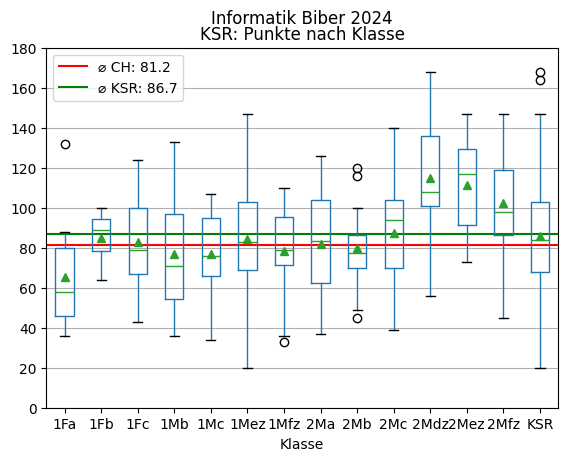

In [192]:
import matplotlib as plt
# Add overall category
class9_10 = df.boxplot(by='Klasse', column=['Punkte'], showmeans=True)
class9_10.set_title("KSR: Punkte nach Klasse")
class9_10.figure.suptitle("Informatik Biber 2024")
class9_10.set_ylim(ymin=0, ymax=180)
class9_10.grid(axis='x')

class9_10.add_line(plt.lines.Line2D([0, 1000], [81.289, 81.289], color='red', label="⌀ CH: 81.2", zorder=-1))
class9_10.add_line(plt.lines.Line2D([0, 1000], [86.732, 86.732], color='green', label="⌀ KSR: 86.7", zorder=-1))

class9_10.legend()
class9_10